In [1]:
import numpy as np
import pandas as pd

X_original: 
 [[ 3.99844570e+00  2.71706366e+00  2.72495272e-02 -8.35155855e-01
   6.41803418e-01  9.79769849e-01  3.19388026e-01 -2.55169949e-01
  -2.34672752e+00  3.10421749e+00  5.83413304e-01  9.61047324e-01
   1.02239008e+00 -1.43865813e+00  3.01314518e+00 -9.97275557e-01
   1.36787880e+00 -2.39163649e+00  1.28429670e+00 -2.66336993e+00
  -3.34466357e-02 -6.14835078e-01 -1.07323985e+00  2.53817335e+00
   1.88777964e+00 -1.77954207e+00  3.24554992e+00 -1.55143131e+00
   1.14971739e+00  1.77638458e+00 -3.77098229e+00  4.51692090e+00
  -2.08700471e+00  1.04901220e+00  2.92253806e+00 -1.74274449e+00
   3.12336659e+00  1.99746219e-01  2.26565032e-01 -1.16309465e-01
   6.14938752e-01 -6.87432127e-01 -1.61549565e+00  6.08468054e-01
  -1.42833829e+00 -7.67624996e-01  2.98937316e+00  1.21788213e+00
  -1.11063406e+00 -6.93060816e-01 -1.50139011e+00 -7.70026351e-01
   1.77850844e+00 -2.41302381e+00  3.78571152e-01 -1.04947114e+00
   2.73460496e+00 -9.44635028e-01  5.27847545e-01  6.85748479e

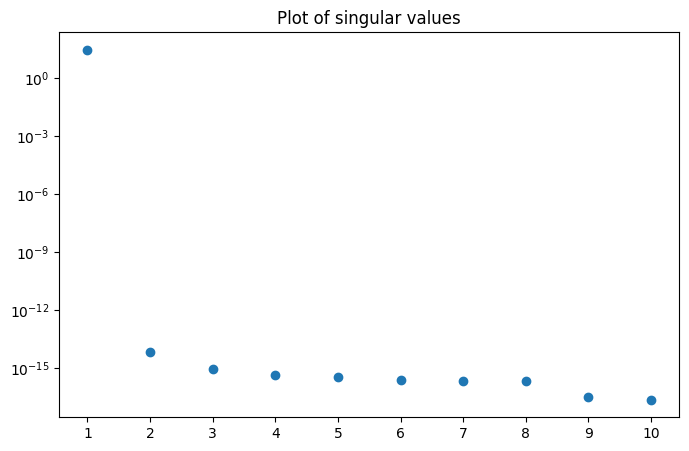

In [2]:
# 03-20-2023 10:52 周學浩 part 1
import numpy as np
import matplotlib.pyplot as plt

# Generate a random 10x100 matrix of rank 4
m, n, r = (10, 100, 1)
A = np.random.normal(size=(m, r))
B = np.random.normal(size=(r, n))
X_original = A @ B

# Compute the SVD
U, S, V = np.linalg.svd(X_original, full_matrices=False)

DEFAULT_FIGSIZE = (8, 5)

plt.figure(figsize=DEFAULT_FIGSIZE)

plt.plot(np.arange(1, len(S) + 1), S, "o")
plt.xticks(np.arange(1, len(S) + 1))
plt.yscale("log")
plt.title("Plot of singular values")

# Confirm U S V = X
np.allclose(U @ np.diag(S) @ V, X_original)




print("X_original: \n" , X_original)


/Users/Ben/miniconda3/envs/findlaneline/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


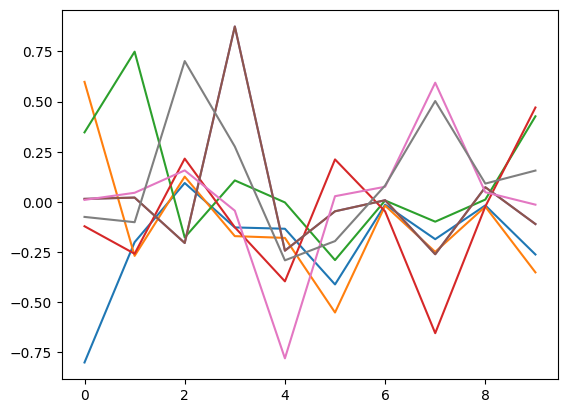

X_reconstructed: 
 [[ 3.99844570e+00  2.71706366e+00  2.72495272e-02 -8.35155855e-01
   6.41803418e-01  9.79769849e-01  3.19388026e-01 -2.55169949e-01
  -2.34672752e+00  3.10421749e+00  5.83413304e-01  9.61047324e-01
   1.02239008e+00 -1.43865813e+00  3.01314518e+00 -9.97275557e-01
   1.36787880e+00 -2.39163649e+00  1.28429670e+00 -2.66336993e+00
  -3.34466357e-02 -6.14835078e-01 -1.07323985e+00  2.53817335e+00
   1.88777964e+00 -1.77954207e+00  3.24554992e+00 -1.55143131e+00
   1.14971739e+00  1.77638458e+00 -3.77098229e+00  4.51692090e+00
  -2.08700471e+00  1.04901220e+00  2.92253806e+00 -1.74274449e+00
   3.12336659e+00  1.99746219e-01  2.26565032e-01 -1.16309465e-01
   6.14938752e-01 -6.87432127e-01 -1.61549565e+00  6.08468054e-01
  -1.42833829e+00 -7.67624996e-01  2.98937316e+00  1.21788213e+00
  -1.11063406e+00 -6.93060816e-01 -1.50139011e+00 -7.70026351e-01
   1.77850844e+00 -2.41302381e+00  3.78571152e-01 -1.04947114e+00
   2.73460496e+00 -9.44635028e-01  5.27847545e-01  6.8574

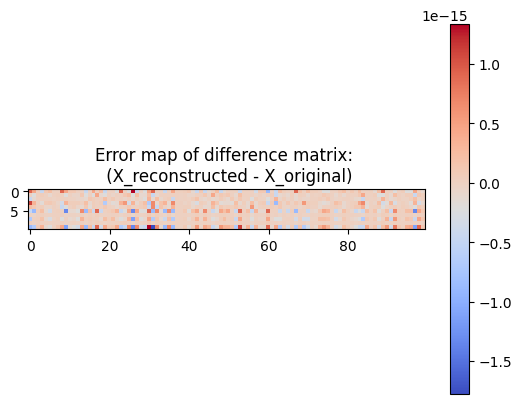

In [3]:
# Compute the mean vector d
d = np.mean(X_original, axis=1)
d_matrix = np.outer(d, np.ones(X_original.shape[1]))

# Center the data by subtracting the mean vector
X_centered = X_original - d_matrix

# Compute the covariance matrix C
C = np.cov(X_centered)

# Compute the eigenvectors of C
eigenvalues, eigenvectors = np.linalg.eig(C)

# Select the first 4 eigenvectors to form the basis matrix C
C = eigenvectors[:, :8]

# Plot each column of C as a separate curve
for i in range(8):
    plt.plot(C[:, i])
plt.show()

# Project the data onto the new basis
Y = C.T @ X_centered

# Reconstruct the data using the compressed representation
X_reconstructed = C @ Y + d_matrix

X_reconstructed = X_reconstructed.real 

print("X_reconstructed: \n" , X_reconstructed)
# Check if the reconstructed data matches the original data
print(np.allclose(X_original, X_reconstructed)) 

# Create the height map of the difference matrix
diff = X_reconstructed - X_original
plt.imshow(diff, cmap='coolwarm')
plt.colorbar()
plt.title("Error map of difference matrix: \n (X_reconstructed - X_original)")
plt.show()

# **Part 2**

(667, 1000, 3)


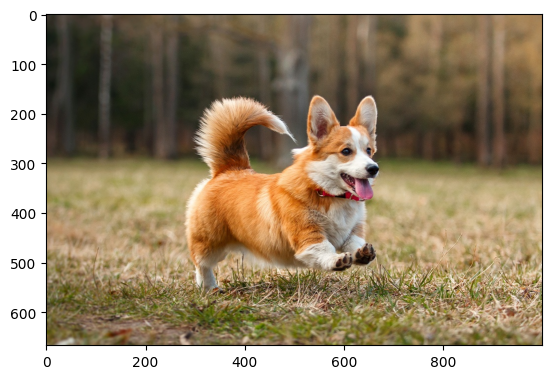

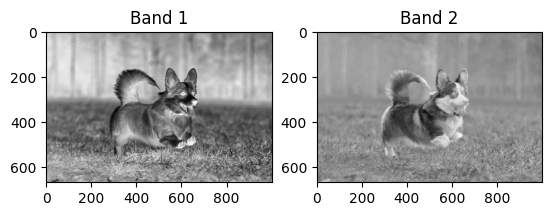

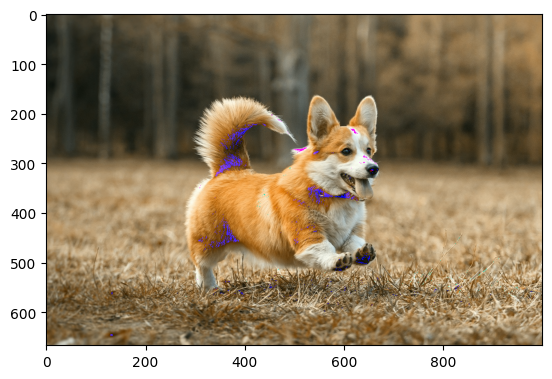

In [10]:
import numpy as np
from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image using cv2
img = Image.open('./CorgiAwSoCute.jpg')

# Convert the image to a numpy array
img_arr = np.array(img)
print(img_arr.shape)
# plot the RGB true-color composition of X.
plt.imshow(img_arr)
plt.show()

# Reshape the image array to a 3 by L matrix
X = np.reshape(img_arr, (-1, 3)).T
X_original = X.copy()

# Compute the mean vector d
d = np.mean(X_original, axis=1)

# Subtract the mean from X to center the data
X_centered = X - np.outer(d, np.ones(X_original.shape[1]))

# Compute the covariance matrix
cov = np.cov(X_centered)

# Compute the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov)

# Sort the eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Choose the first 2 eigenvectors and project the data onto this subspace
projection_matrix = eigenvectors[:, :2]
Y = np.dot(projection_matrix.T, X_centered)

# Plot the two band images in Y as two gray-scale images
Y1 = np.reshape(Y[0], img_arr[:, :, 0].shape)
Y2 = np.reshape(Y[1], img_arr[:, :, 0].shape)

plt.subplot(1, 2, 1)
plt.imshow(Y1, cmap='gray')
plt.title('Band 1')

plt.subplot(1, 2, 2)
plt.imshow(Y2, cmap='gray')
plt.title('Band 2')

plt.show()

# Reconstruct the decompressed image Xc from Y
Xc = np.dot(projection_matrix, Y) + np.outer(d, np.ones(X.shape[1]))
Xc = np.reshape(Xc.T.astype(np.uint8), img_arr.shape)

plt.imshow(Xc)
plt.show()
# Save the decompressed image
Image.fromarray(np.uint8(Xc)).save('decompressed_image.jpg')